In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
df = pd.read_csv("/home/hadiii/python3/cell_samples.csv")
print("Shape:", df.shape)
print("--------------->\n",df.head())
print("--------------->\n",df.describe())

Shape: (699, 11)
--------------->
         ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  
--------------->
                  ID       Clump    UnifSize   UnifShape     MargAdh  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
mi

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Clump'}>,
        <Axes: title={'center': 'UnifSize'}>],
       [<Axes: title={'center': 'UnifShape'}>,
        <Axes: title={'center': 'MargAdh'}>,
        <Axes: title={'center': 'SingEpiSize'}>],
       [<Axes: title={'center': 'BlandChrom'}>,
        <Axes: title={'center': 'NormNucl'}>,
        <Axes: title={'center': 'Mit'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >, <Axes: >]],
      dtype=object)

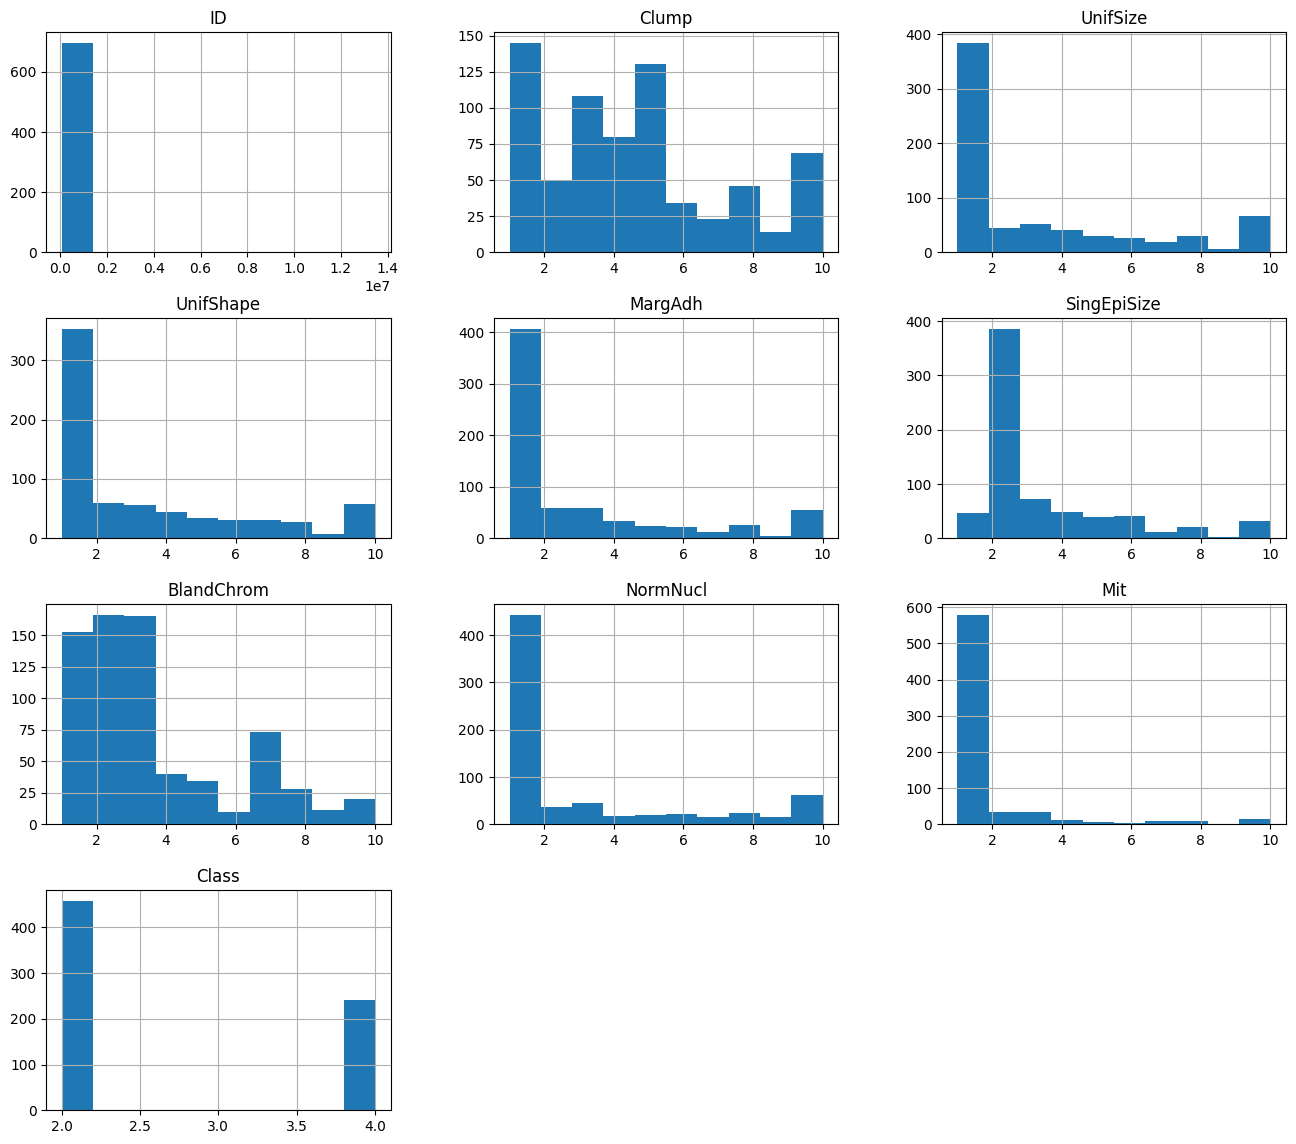

In [54]:
df.hist(figsize=(16, 14))

In [55]:
print(df.info())
print(df['BareNuc'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None
BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64


In [56]:
df['BareNuc'] = df['BareNuc'].replace('?', np.nan)
df['BareNuc'] = df['BareNuc'].astype(float)
df['BareNuc'].fillna(df['BareNuc'].median(), inplace=True)
df['Class'] = df['Class'].map({2: 0, 4: 1})

/tmp/ipykernel_9015/1623849286.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BareNuc'].fillna(df['BareNuc'].median(), inplace=True)


In [58]:
print(df)
X = df.drop('Class', axis=1)
y = df['Class']


          ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize  BareNuc  \
0    1000025      5         1          1        1            2      1.0   
1    1002945      5         4          4        5            7     10.0   
2    1015425      3         1          1        1            2      2.0   
3    1016277      6         8          8        1            3      4.0   
4    1017023      4         1          1        3            2      1.0   
..       ...    ...       ...        ...      ...          ...      ...   
694   776715      3         1          1        1            3      2.0   
695   841769      2         1          1        1            2      1.0   
696   888820      5        10         10        3            7      3.0   
697   897471      4         8          6        4            3      4.0   
698   897471      4         8          8        5            4      5.0   

     BlandChrom  NormNucl  Mit  Class  
0             3         1    1      0  
1             3    

=== RBF SVM ===
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        92
           1       0.92      0.96      0.94        48

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



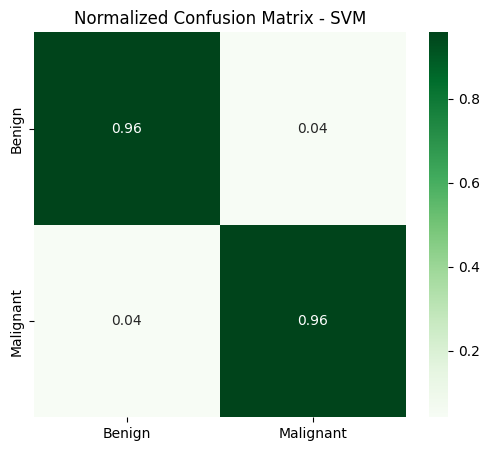

In [67]:
svm_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(
        kernel="rbf",
        C=1.0,
        gamma="scale",
        class_weight="balanced",
        random_state=42
    ))
])

svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("=== RBF SVM ===")
print(classification_report(y_test, y_pred_rbf))

cm_norm = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="Greens",
    xticklabels=["Benign", "Malignant"],
    yticklabels=["Benign", "Malignant"]
)
plt.title("Normalized Confusion Matrix - SVM")
plt.show()

In [65]:
tn, fp, fn, tp = cm.ravel()

print(f"True Negative  (Benign → Benign): {tn}")
print(f"False Positive (Benign → Malignant): {fp}")
print(f"False Negative (Malignant → Benign): {fn}")
print(f"True Positive  (Malignant → Malignant): {tp}")


True Negative  (Benign → Benign): 88
False Positive (Benign → Malignant): 4
False Negative (Malignant → Benign): 2
True Positive  (Malignant → Malignant): 46
